In [35]:
import nltk
nltk.download('movie_revies')

from nltk.corpus import movie_reviews

print('#review count:',len(movie_reviews.fileids()))
print('sample',movie_reviews.fileids()[:10])

fileid = movie_reviews.fileids()[0]
print(fileid)

#첫번째 문서의 내용을 200자까지만 출력
print(movie_reviews.raw(fileid)[:200])

#첫번째 문서를 sentence tokenize한 결과 중 앞 두 문자
print(movie_reviews.sents(fileid)[:2])

#첫번째 문서를 word tokenize한 결과 중 앞 20개 단어
print(movie_reviews.words(fileid)[:20])

#review count: 2000
sample ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


[nltk_data] Error loading movie_revies: Package 'movie_revies' not
[nltk_data]     found in index


In [36]:
documents = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
print(documents[0][:50])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


In [37]:
word_count = {}

for text in documents:
  for word in text:
    word_count[word] = word_count.get(word,0) + 1
    
sorted_features = sorted(word_count, key=word_count.get, reverse=True)

for word in sorted_features[:10]:
  print(f"count of '{word}:{word_count[word]}",end=', ')

count of ',:77717, count of 'the:76529, count of '.:65876, count of 'a:38106, count of 'and:35576, count of 'of:34123, count of 'to:31937, count of '':30585, count of 'is:25195, count of 'in:21822, 

In [38]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords #일반적 분석 대상이 아닌 words

tokenizer = RegexpTokenizer("[\w]{3,}") #3글자 이상의 단어만 추출, 정규 표현식으로 토크나이저 정의
eng_stops = set(stopwords.words('english'))

#words 대신 raw로 원문 가져옴

documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

#stopwords의 적용과 토큰화를 동시에 수행.

tokens = [[token for token in tokenizer.tokenize(doc) if token not in eng_stops] for doc in documents]

word_count = {}
for text in tokens:
  for word in text:
    word_count[word] = word_count.get(word,0) + 1
    
sorted_features = sorted(word_count, key=word_count.get, reverse=True)

print('num of features:',len(sorted_features))
for word in sorted_features[:10]:
  print(f"count of '{word}: {word_count[word]}",end=', ')

num of features: 39208
count of 'film: 9517, count of 'one: 5852, count of 'movie: 5771, count of 'like: 3690, count of 'even: 2565, count of 'good: 2411, count of 'time: 2411, count of 'story: 2169, count of 'would: 2109, count of 'much: 2049, 

In [39]:
# 빈도가 높은 상위 1000개ㅔ의 단어만 추출해 features를 구성
word_features = sorted_features[:1000]

In [40]:
# 주어진 document를 feature로 변환하는 함수, word_features를 사용

def document_features(document, word_features):
  word_count={}
  for word in document:
    word_count[word] = word_count.get(word,0) + 1
    
  features = []
  # word features의 단어에 대해 계산된 빈도수를 feature에 추가
  for word in word_features:
    features.append(word_count.get(word,0))
  return features

word_features_ex = ['one','two','teeb','couples','solo']
doc_ex = ['two','two','couples']
print(document_features(doc_ex, word_features_ex))

[0, 2, 0, 1, 0]


In [41]:
feature_sets = [document_features(d, word_features) for d in tokens]

#첫째 feature set의 내용을 앞 20개만 word_features의 단어와 함께 출력

for i in range(20):
  print(f'({word_features[i]}),{feature_sets[0][i]}',end=', ')

(film),6, (one),3, (movie),6, (like),3, (even),3, (good),2, (time),0, (story),0, (would),1, (much),0, (character),2, (also),1, (get),3, (two),2, (well),1, (characters),1, (first),0, (see),2, (way),3, (make),5, 

In [42]:
# 사이킷 런으로 카운트 벡터 생성

In [43]:
# data 준비, movie_reviews.raw()를 사용해 raw text 추출
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer() 모든 매개변수에 기본값을 사용하는 경우

# 앞에서 생성한 word_features 로 특성 집합을 지정하는 경우

cv = CountVectorizer(vocabulary=word_features)

# 특성 집합을 정하지 않고 최대 특성의 수를 지정하는 경우

# cb = CountVectorizer(max_features=1000)

print(cv)
print(type(cv))

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'good',
                            'time', 'story', 'would', 'much', 'character',
                            'also', 'get', 'two', 'well', 'characters', 'first',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'scene', 'man',
                            'bad', ...])
<class 'sklearn.feature_extraction.text.CountVectorizer'>


In [45]:
reviews_cv = cv.fit_transform(reviews) # reviews를 이용해 count vector를 학습하고, 변환
print(cv.get_feature_names_out()[:20])
print(word_features[:20])

['film' 'one' 'movie' 'like' 'even' 'good' 'time' 'story' 'would' 'much'
 'character' 'also' 'get' 'two' 'well' 'characters' 'first' 'see' 'way'
 'make']
['film', 'one', 'movie', 'like', 'even', 'good', 'time', 'story', 'would', 'much', 'character', 'also', 'get', 'two', 'well', 'characters', 'first', 'see', 'way', 'make']


In [46]:
print('#type of count vectors:',type(reviews_cv))
print('#type of count vectors:',reviews_cv.shape)
print()
print(reviews_cv[0,:10])

#type of count vectors: <class 'scipy.sparse._csr.csr_matrix'>
#type of count vectors: (2000, 1000)

  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 5)	2
  (0, 8)	1


In [47]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 254135 stored elements in Compressed Sparse Row format>

In [48]:
print(feature_sets[0][:20])

print(reviews_cv.toarray()[0,:20])

[6, 3, 6, 3, 3, 2, 0, 0, 1, 0, 2, 1, 3, 2, 1, 1, 0, 2, 3, 5]
[6 3 6 3 3 2 0 0 1 0 2 1 3 2 1 1 0 2 3 5]


In [49]:
for word, count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :20]):
  print(f'{word}:{count}',end=', ')

film:6, one:3, movie:6, like:3, even:3, good:2, time:0, story:0, would:1, much:0, character:2, also:1, get:3, two:2, well:1, characters:1, first:0, see:2, way:3, make:5, 

In [50]:
#4.4 한국어 텍스트의 카운트 벡터 변환

In [51]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
daum_cv = CountVectorizer(max_features=1000)

#reveiew를 이용해 count vector를 학습하고, 변환

daum_DTM = daum_cv.fit_transform(df.review)
print(daum_cv.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름을 반환

['10점' '18' '1987' '1도' '1점' '1점도' '2시간' '2시간이' '2편' '5점' '6점' '7점' '8점'
 'cg' 'cg가' 'cg는' 'cg도' 'cg만' 'good' 'of' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ'
 'ㅜㅜ' 'ㅠㅠ' 'ㅠㅠㅠ' 'ㅡㅡ' '가는' '가는줄' '가면' '가서' '가슴' '가슴아픈' '가슴이' '가장' '가족'
 '가족과' '가족들과' '가족의' '가족이' '가지고' '간만에' '갈수록' '감독' '감독님' '감독은' '감독의' '감독이'
 '감동' '감동과' '감동도' '감동은' '감동을' '감동이' '감동입니다' '감동적' '감동적이고' '감동적인' '감사드립니다'
 '감사합니다' '감정이' '갑자기' '갔는데' '갔다가' '강철비' '강추' '강추합니다' '같고' '같네요' '같다' '같습니다'
 '같아' '같아요' '같은' '같은데' '같음' '같이' '개연성' '개연성이' '개인적으로' '거의' '겁나' '것도' '것은'
 '것을' '것이' '것이다' '겨울왕국' '결국' '결말' '결말이' '계속' '고맙습니다' '곤지암' '공포' '공포를'
 '공포영화' '관객']


In [53]:
from konlpy.tag import Okt
from konlpy.tag import Okt
jvm_path = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java"
twitter_tag = Okt(jvmpath=jvm_path)

print('전체 형태소 : ', twitter_tag.morphs(df.review[1]))
print('전체 형태소 : ', twitter_tag.nouns(df.review[1]))
print('전체 형태소 : ', twitter_tag.pos(df.review[1]))

전체 형태소 :  ['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']
전체 형태소 :  ['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']
전체 형태소 :  [('몰입', 'Noun'), ('할수밖에', 'Verb'), ('없다', 'Adjective'), ('.', 'Punctuation'), ('어렵게', 'Adjective'), ('생각', 'Noun'), ('할', 'Verb'), ('필요없다', 'Adjective'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('전투', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('한', 'Determiner'), ('듯', 'Noun'), ('손', 'Noun'), ('에', 'Josa'), ('땀', 'Noun'), ('이남', 'Noun'), ('.', 'Punctuation')]


In [54]:
def my_tokenizer(doc):
  return [
    token for token,pos in twitter_tag.pos(doc) if pos in ['Noun','Adjective','Verb']
  ]
  
print(my_tokenizer(df.review[1]))

['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# 토크나이저와 특성의 최대 개수 지정
# 명사만 추출하고 싶은 경우 tokenizer에 'twitter_tag.nouns를 바로 지정해도 됨

daum_cv = CountVectorizer(max_features=1000, tokenizer=my_tokenizer)

# review를 이용해 count vector를 학습하고, 변환
daum_DTM = daum_cv.fit_transform(df.review)

print(daum_cv.get_feature_names_out()[:100]) #count vector에 사용된 feature이름을 반환

/Users/leecoder/miniconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['가' '가는' '가는줄' '가면' '가서' '가슴' '가장' '가족' '가족영화' '가지' '가치' '각색' '간' '간다'
 '간만' '갈' '갈수록' '감' '감독' '감동' '감사' '감사합니다' '감상' '감성' '감정' '감탄' '갑자기' '갔는데'
 '갔다' '갔다가' '강' '강철' '강추' '같고' '같네요' '같다' '같습니다' '같아' '같아요' '같은' '같은데'
 '같음' '개' '개그' '개봉' '개연' '개인' '거' '거기' '거리' '거의' '걱정' '건' '건가' '건지' '걸'
 '겁니다' '것' '게' '겨울왕국' '결론' '결말' '경찰' '경험' '계속' '고' '고맙습니다' '고민' '고생' '곤지암'
 '곳' '공감' '공포' '공포영화' '과' '과거' '관' '관객' '관객수' '관람' '광주' '괜찮은' '교훈' '구성'
 '국내' '국민' '군인' '군함도' '굿' '권선' '귀신' '그' '그것' '그게' '그날' '그냥' '그닥' '그대로'
 '그때' '그래픽']


In [56]:
print(repr(daum_DTM))
print(110800/(14725*1000))

<14725x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 110800 stored elements in Compressed Sparse Row format>
0.007524617996604414


In [57]:
for word,count in zip(daum_cv.get_feature_names_out(),daum_DTM[1].toarray()[0]):
  if count > 0:
    print(f'{word}:{count}',end=', ')

내:1, 듯:1, 몰입:1, 생각:1, 손:1, 없다:1, 할:1, 

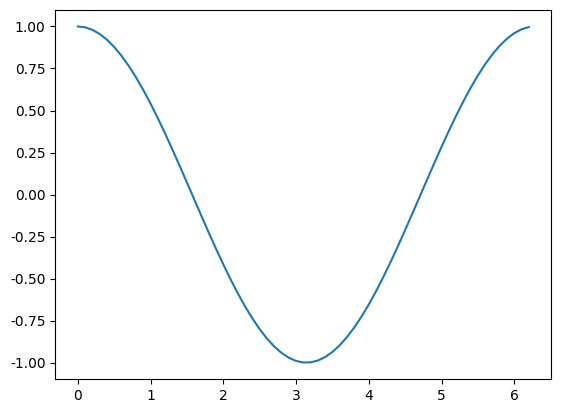

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']  = False

import numpy as np

x = np.arange(0, 2*np.pi, 0.1) #start, stop,step

y = np.cos(x)
#print(x)
plt.plot(x,y)
plt.show()

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

#첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해 중심점을 찾음
start = len(reviews[0]) //2

#중심점으로부터 뒤 절반을 가져와서 비교할 문서 생성
source = reviews[0][-start:]

#코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

source_cv = cv.transform([source])

#행렬의 크기를 확인, 문서가 하나이므로 (1,1000)
print(source_cv.shape)

#변환된 count vector와 기존 값들과의 similarity 계산
sim_result = cosine_similarity(source_cv, reviews_cv)

print(sim_result.shape)
print(sorted(sim_result[0],reverse=True)[:10])

(1, 1000)
(1, 2000)
[0.8367205630128807, 0.43784070017231075, 0.4080451370075411, 0.4063802391472214, 0.4060219836225451, 0.39965783997760135, 0.3994228018440035, 0.39566661804603703, 0.3938902773761537, 0.3911637170821695]


In [62]:
import numpy as np
print('가장 유사',np.argmax(sim_result[0]))

가장 유사 0


In [63]:
print('#가장 유사한 리뷰부터 정렬한 인덱스',(-sim_result[0].argsort()[:10]))

#가장 유사한 리뷰부터 정렬한 인덱스 [-1640  -868  -857 -1061 -1277  -779 -1484  -671 -1471  -913]


In [64]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

reviews_tfidf = transformer.fit_transform(reviews_cv)

#TF-IDF 행렬 모양과 카운트 행렬 모양이 일치하는지 확인
print(reviews_tfidf.shape)

#첫 리뷰의 카운트 벡터 중 앞 20개 출력
print(reviews_cv[0].toarray()[0][:20])

#첫 리뷰의 TF IDF 벡터 중 앞 20개 값 출력
print(reviews_tfidf[0].toarray()[0][:20])

(2000, 1000)
[6 3 6 3 3 2 0 0 1 0 2 1 3 2 1 1 0 2 3 5]
[0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.0609124
 0.         0.         0.03126552 0.         0.06575035 0.03242315
 0.09567082 0.06518293 0.03225625 0.0345017  0.         0.06863314
 0.10042383 0.16727495]


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(vocabulary=word_features)
reviews_tf = tf.fit_transform(reviews)

#코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력
source_tf = tf.transform([source])

#변환된 count vector와 기존 값들과의 similarity 계산
sim_result_tf = cosine_similarity(source_tf, reviews_tf)

print(np.argmax(sim_result_tf[0]))

0


In [67]:
print(sim_result[0].argsort()[:10])

[1640  868  857 1061 1277  779 1484  671 1471  913]
